[ 0.          0.043667    0.23261939  0.61207297  1.08254802  1.430965
  1.42309644  0.91853236 -0.04181914 -1.21643628]
[  0.           0.87333998   2.9057078    4.68336375   4.72613734
   2.24220224  -2.39957331  -7.69170832 -11.51532177 -11.97702095]
[ 0.00000000e+00  5.00000000e+00  8.66025404e+00  1.00000000e+01
  8.66025404e+00  5.00000000e+00 -3.21624530e-15 -5.00000000e+00
 -8.66025404e+00 -1.00000000e+01]


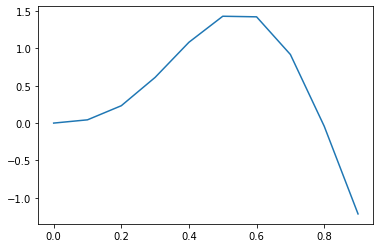

In [3]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

dt=0.1
t=np.arange(0,1,dt)        
m=0.2533 
P=10*np.sin(np.pi*t/0.6) 
# Kips-sec2/in
# Newmark´s Method
#  Initial calculations
beta=1/4
gamma=1/2
# Kips/in
Tn=1 # Natural periodo
K0=m*(2*np.pi/Tn)**2
Wn=np.sqrt(K0/m);
damp=0.05 # Damping 
c=2*damp*m*Wn;
a=(m/(beta*dt))+(gamma/beta)*c
b=m/(2*beta)+dt*((gamma/(2*beta))-1)*c

# Initial conditions######################################################

u = np.zeros((len(P)))
vel = np.zeros((len(P)))
acc = np.zeros((len(P)))

K = K0

K1 = K+((gamma*c)/(beta*dt))+(m/(beta*dt**2))
  
i = 0

while i < len(P)-1: 
    deltaP=(P[i+1]-P[i])+a*vel[i]+b*acc[i]  
    deltaU = deltaP/K1
    deltavel=(gamma/(beta*dt))*deltaU-((gamma/beta)*vel[i])+dt*(1-(gamma/(2*beta)))*acc[i]
    deltacc=(deltaU/(beta*dt**2))-(vel[i]/(beta*dt))-(acc[i]/(2*beta))
    u[i+1]=u[i] + deltaU 
    vel[i+1] = vel[i] + deltavel
    acc[i+1] = acc[i] + deltacc
    i+=1
          
print(u)
print(vel)
print(P)
plt.plot(t,u)

In [4]:
from scipy.integrate import odeint
def f(u,x):
    return(0.2533*u[1], - 0.1592*u[1] - K0*u[0] + 10*np.sin(np.pi*x/0.6))
y0=[0,0]
xs = t
u_theor = odeint(f,y0,xs)
ys = u_theor[:,0]

print(K0)

9.999883179183739


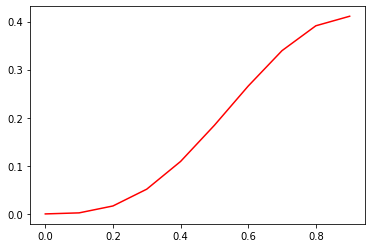

In [5]:
#plt.plot(t,u)
plt.plot(xs,ys,color='red')